Elina Kelly MBD

# Chapter 9

#### Exercise 1 p368

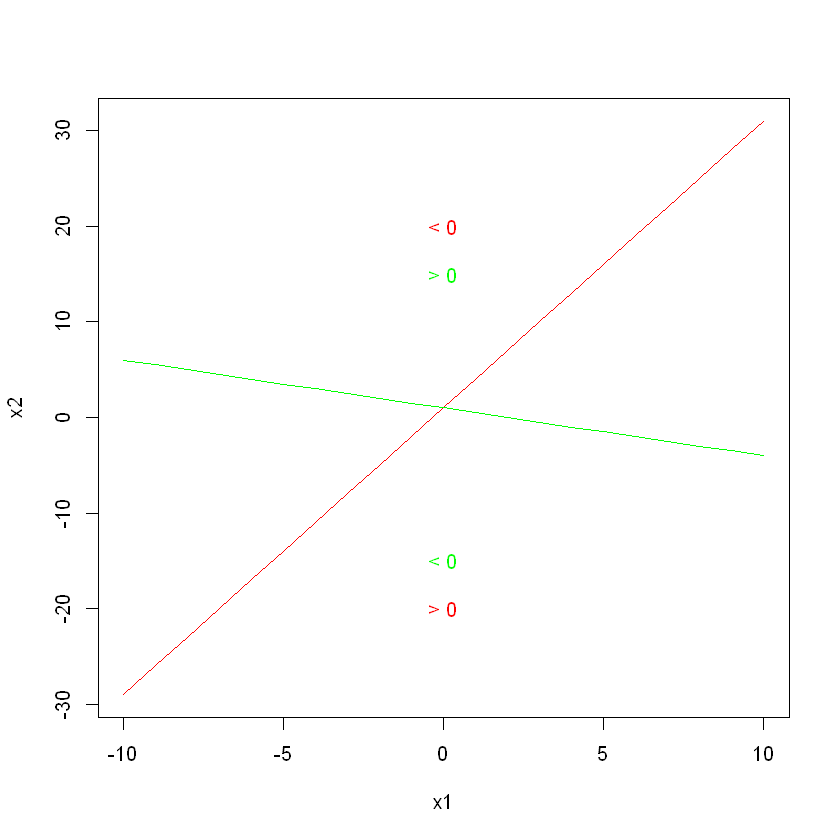

In [1]:
x1 = -10:10
x2 = 1 + 3 * x1
plot(x1, x2, type = "l", col = "red")
text(c(0), c(-20), "> 0", col = "red")
text(c(0), c(20), "< 0", col = "red")
lines(x1, 1 - x1/2, col = "green")
text(c(0), c(-15), "< 0", col = "green")
text(c(0), c(15), "> 0", col = "green")

#### Exercise 4 p369

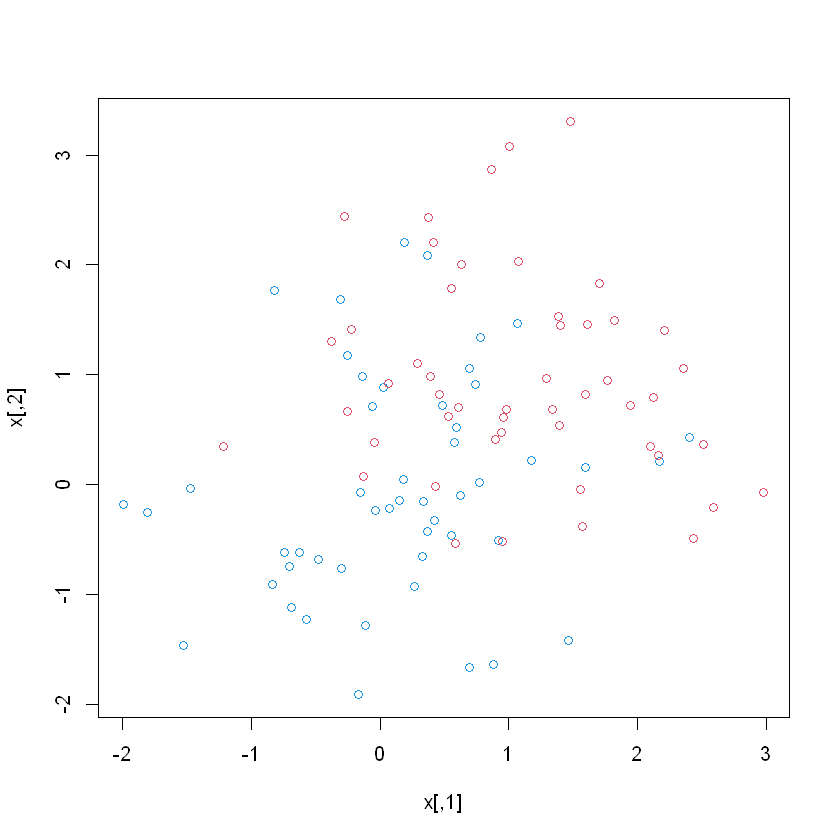

In [74]:
set.seed(1)
x = matrix(rnorm(100*2), ncol=2)
y = c(rep(-1,10), rep(1,10))
x[y==1,] = x[y==1,] + 1
dat = data.frame(x=x, y=as.factor(y))
plot(x, col=(3-y))

In [87]:
dat

x.1,x.2,y
<dbl>,<dbl>,<fct>
-0.62645381,-0.62036668,-1
0.18364332,0.04211587,-1
-0.83562861,-0.91092165,-1
1.59528080,0.15802877,-1
0.32950777,-0.65458464,-1
-0.82046838,1.76728727,-1
0.48742905,0.71670748,-1
0.73832471,0.91017423,-1
0.57578135,0.38418536,-1


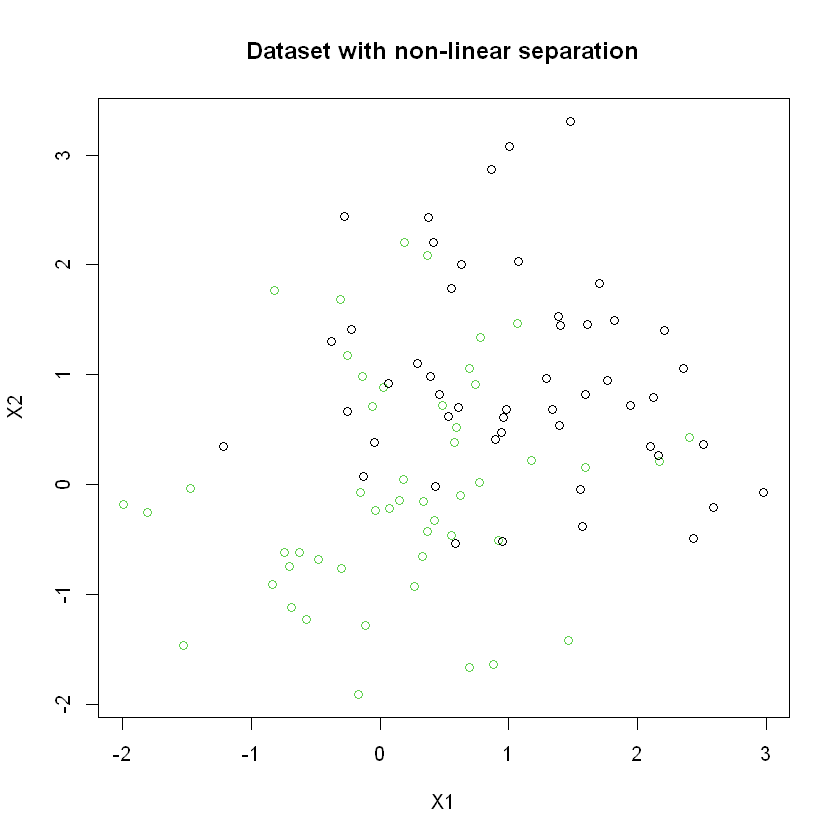

In [90]:
set.seed(1)

sample <- sample(1:nrow(dat), size=round(0.7*nrow(dat)), replace=FALSE)

dat.train <- dat[sample,] 
dat.test <- dat[-sample,]

plot(x,col=(2-y), xlab='X1', ylab='X2', main='Dataset with non-linear separation')

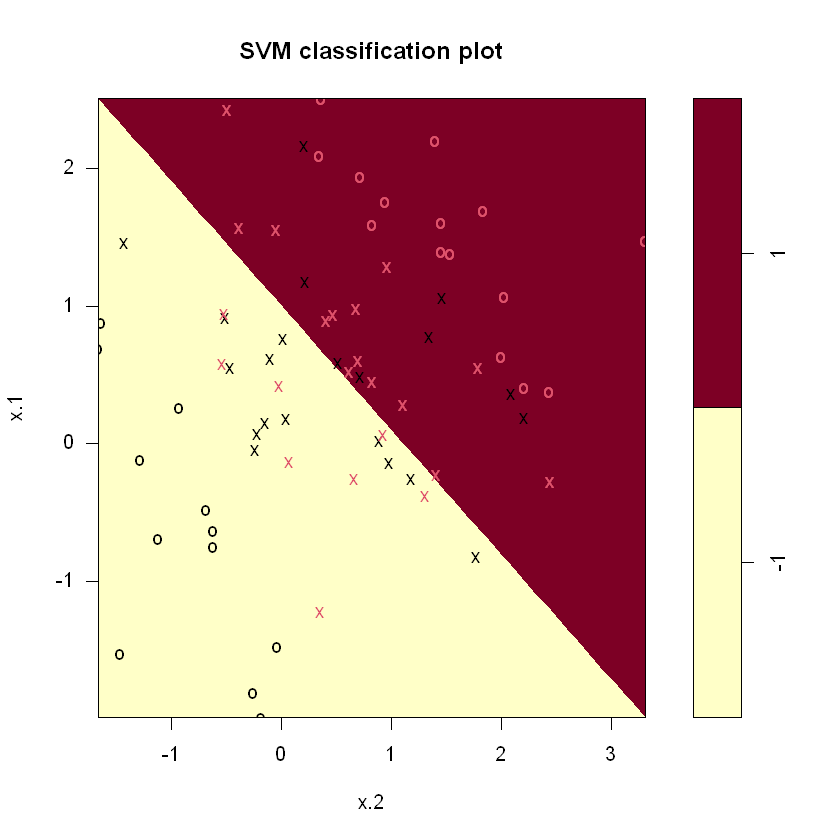

In [91]:
# Linear Train

library(e1071)
svm.linear <- svm(y ~ ., data = dat.train, kernel = "linear", cost = 10)
plot(svm.linear, dat.train)

In [92]:
table(predict = predict(svm.linear, dat.train), truth = dat.train$y)

## 8 errors on the training set

       truth
predict -1  1
     -1 25  8
     1   8 29

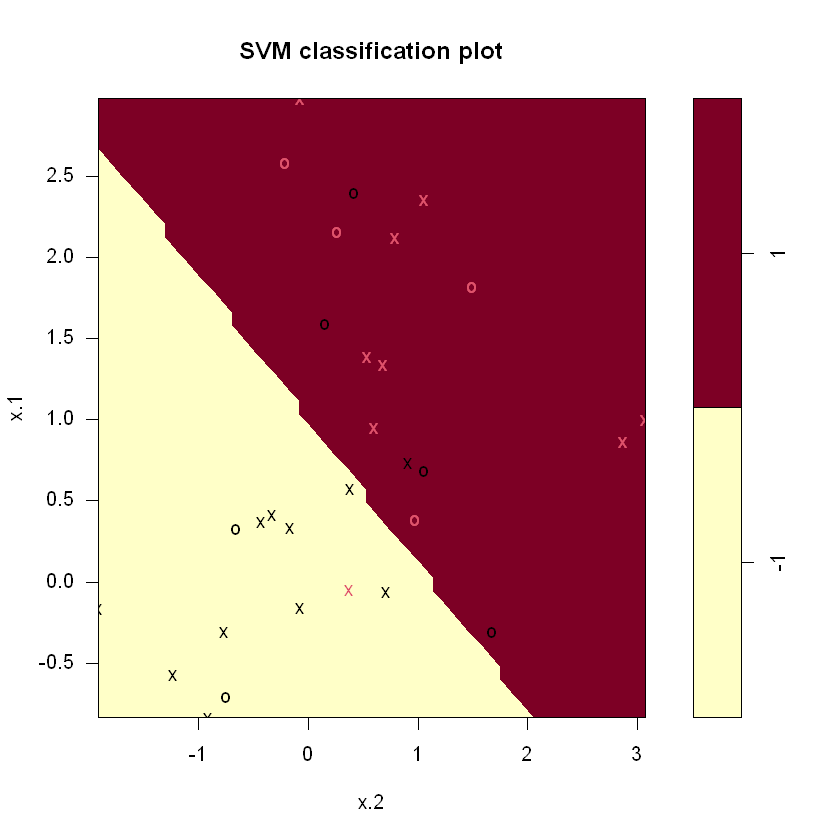

In [97]:
# Linear Test

plot(svm.linear, dat.test)

In [99]:
table(predict = predict(svm.linear, dat.test), truth = dat.test$y)

## 5 errors

       truth
predict -1  1
     -1 12  1
     1   5 12

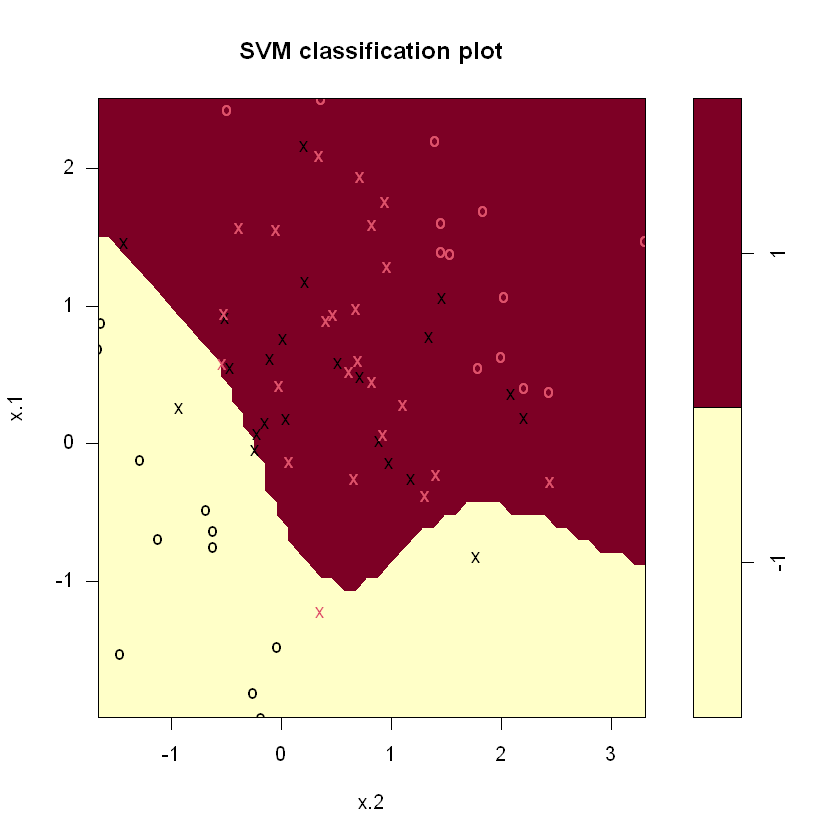

In [93]:
# Polynomial Train

svm.poly <- svm(y ~ ., data = dat.train, kernel = "polynomial", cost = 10)
plot(svm.poly, dat.train)

In [94]:
table(predict = predict(svm.poly, dat.train), truth = dat.train$y)

## 20 errors

       truth
predict -1  1
     -1 13  1
     1  20 36

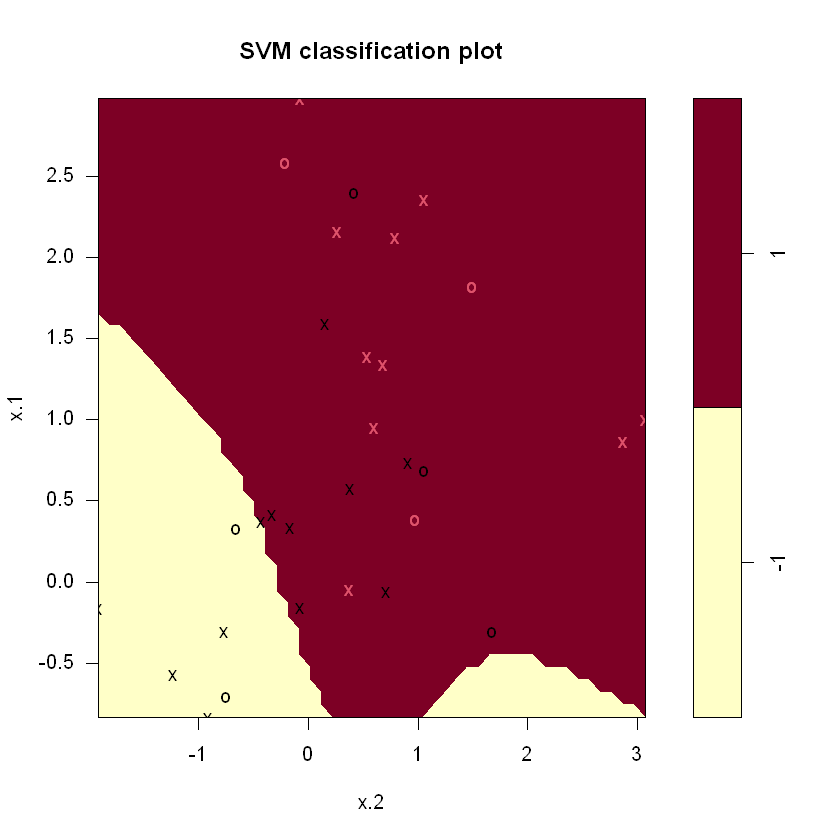

In [100]:
# Polynomial Test

plot(svm.poly, dat.test)

In [101]:
table(predict = predict(svm.poly, dat.test), truth = dat.test$y)

## 11 errors

       truth
predict -1  1
     -1  6  0
     1  11 13

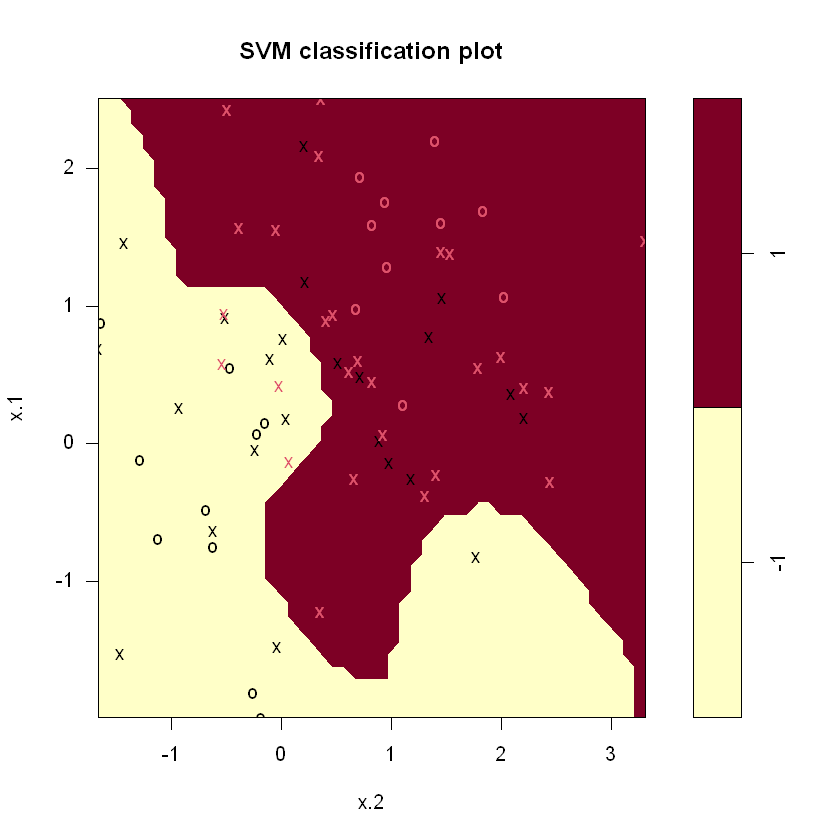

In [95]:
# Radial Train

svm.radial <- svm(y ~ ., data = dat.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, dat.train)

In [96]:
table(predict = predict(svm.radial, dat.train), truth = dat.train$y)

## 11 errors

       truth
predict -1  1
     -1 22  4
     1  11 33

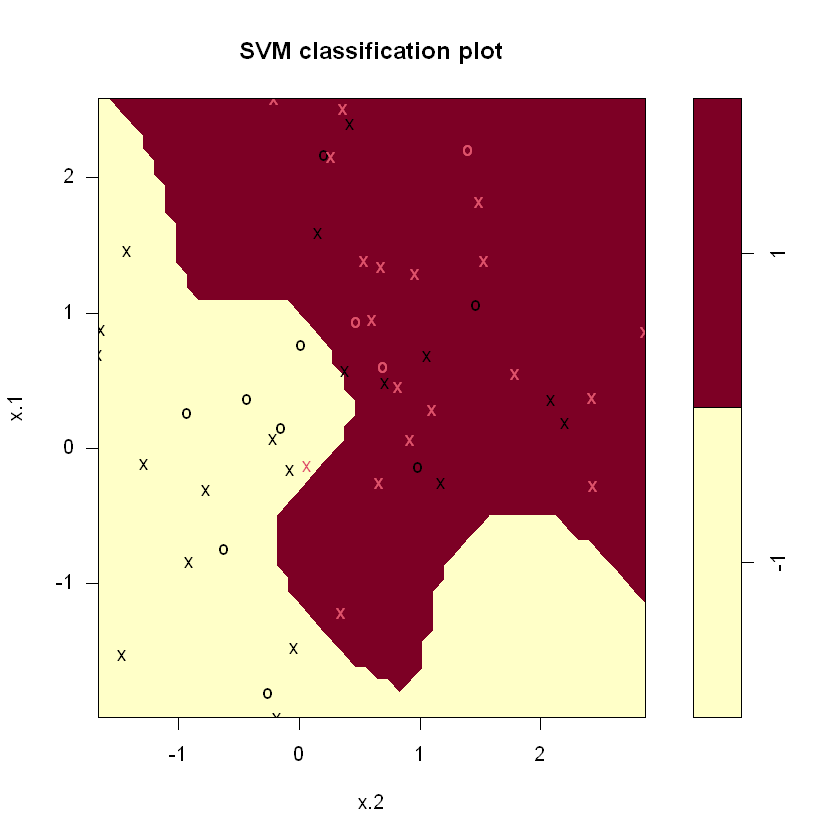

In [102]:
# Radial Test

plot(svm.radial, data.test)

In [103]:
table(predict = predict(svm.radial, dat.test), truth = dat.test$y)

## 7 errors

       truth
predict -1  1
     -1 10  0
     1   7 13

In [ ]:
## The linear approach is the best approach with only 5 errors

#### Exercise 7 p371

In [4]:
# (a)
library(ISLR)
Auto$above_median <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$above_median <- as.factor(Auto$above_median)

In [6]:
# (b)
library(e1071)
set.seed(1)
svmfit <- tune(svm, above_median ~ ., data=Auto, kernel="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(svmfit)

## When the cost increases the error decreases until cost = 1, then the error increases 


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-03 0.09442308 0.04519425
2 1e-02 0.07653846 0.03617137
3 1e-01 0.04596154 0.03378238
4 1e+00 0.01025641 0.01792836
5 5e+00 0.02051282 0.02648194
6 1e+01 0.02051282 0.02648194
7 1e+02 0.03076923 0.03151981
8 1e+03 0.03076923 0.03151981


In [7]:
# (c)
# radial
set.seed(1)
radial <- tune(svm, above_median~., data=Auto, kernel='radial', ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(radial)

## The error decreases the lowest until 0.002564103 at cost = 1e+03 before increasing


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.04865385 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-01   0.5 0.07910256 0.04234351
2  1e+00   0.5 0.05115385 0.02716416
3  1e+01   0.5 0.04865385 0.03075209
4  1e+02   0.5 0.05121795 0.03424201
5  1e+03   0.5 0.05121795 0.03424201
6  1e-01   1.0 0.55115385 0.04366593
7  1e+00   1.0 0.06384615 0.04375618
8  1e+01   1.0 0.05884615 0.04020934
9  1e+02   1.0 0.05884615 0.04020934
10 1e+03   1.0 0.05884615 0.04020934
11 1e-01   2.0 0.55115385 0.04366593
12 1e+00   2.0 0.14019231 0.07984711
13 1e+01   2.0 0.13512821 0.08055403
14 1e+02   2.0 0.13512821 0.08055403
15 1e+03   2.0 0.13512821 0.08055403
16 1e-01   3.0 0.55115385 0.04366593
17 1e+00   3.0 0.41326923 0.14331350
18 1e+01   3.0 0.38025641 0.14908523
19 1e+02   3.0 0.38025641 0.14908523
20 1e+03   3.0 0.38025641 0.14908523
21 1e-01   4.0 0.55115385 0.04366593
22

In [55]:
# polynomial
set.seed(1)
polynomial <- tune(svm, above_median~., data=Auto, kernel='poly', ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(polynomial)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  0.1     1

- best performance: 0.04096154 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-01   0.5 0.04608974 0.04327907
2  1e+00   0.5 0.04352564 0.03835271
3  1e+01   0.5 0.04358974 0.03636247
4  1e+02   0.5 0.04358974 0.03636247
5  1e+03   0.5 0.04358974 0.03636247
6  1e-01   1.0 0.04096154 0.04047941
7  1e+00   1.0 0.04358974 0.03636247
8  1e+01   1.0 0.04358974 0.03636247
9  1e+02   1.0 0.04358974 0.03636247
10 1e+03   1.0 0.04358974 0.03636247
11 1e-01   2.0 0.04615385 0.03585671
12 1e+00   2.0 0.04358974 0.03636247
13 1e+01   2.0 0.04358974 0.03636247
14 1e+02   2.0 0.04358974 0.03636247
15 1e+03   2.0 0.04358974 0.03636247
16 1e-01   3.0 0.04358974 0.03636247
17 1e+00   3.0 0.04358974 0.03636247
18 1e+01   3.0 0.04358974 0.03636247
19 1e+02   3.0 0.04358974 0.03636247
20 1e+03   3.0 0.04358974 0.03636247
21 1e-01   4.0 0.04358974 0.03636247
22

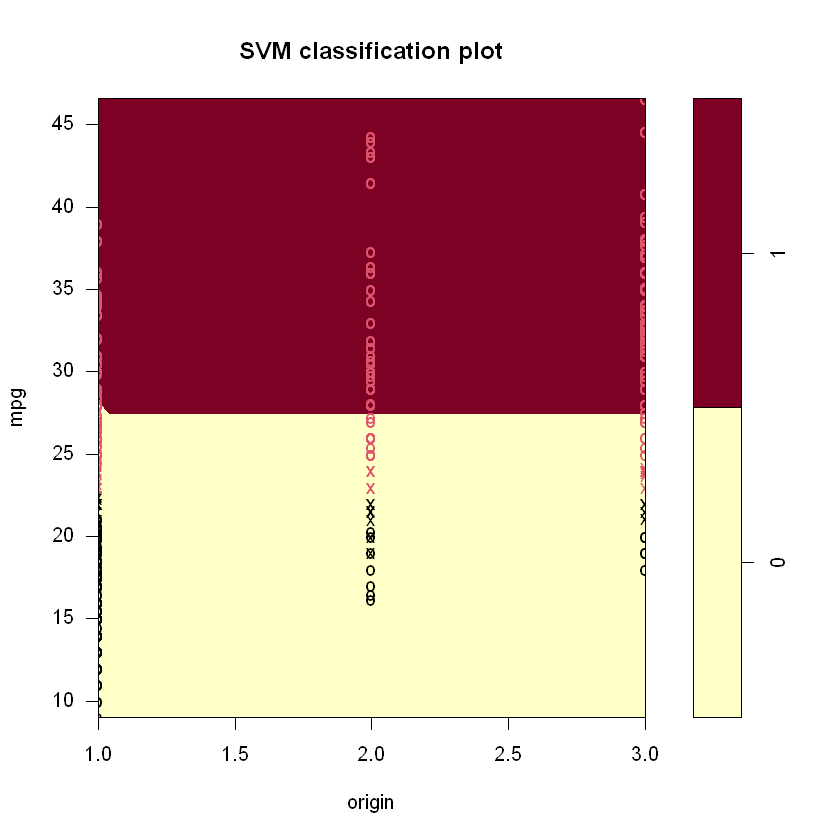

In [9]:
# (d)
svm.linear <- svm(above_median ~ ., data = Auto, kernel = "linear", cost = 1)
plot(svm.linear, Auto, mpg~origin)

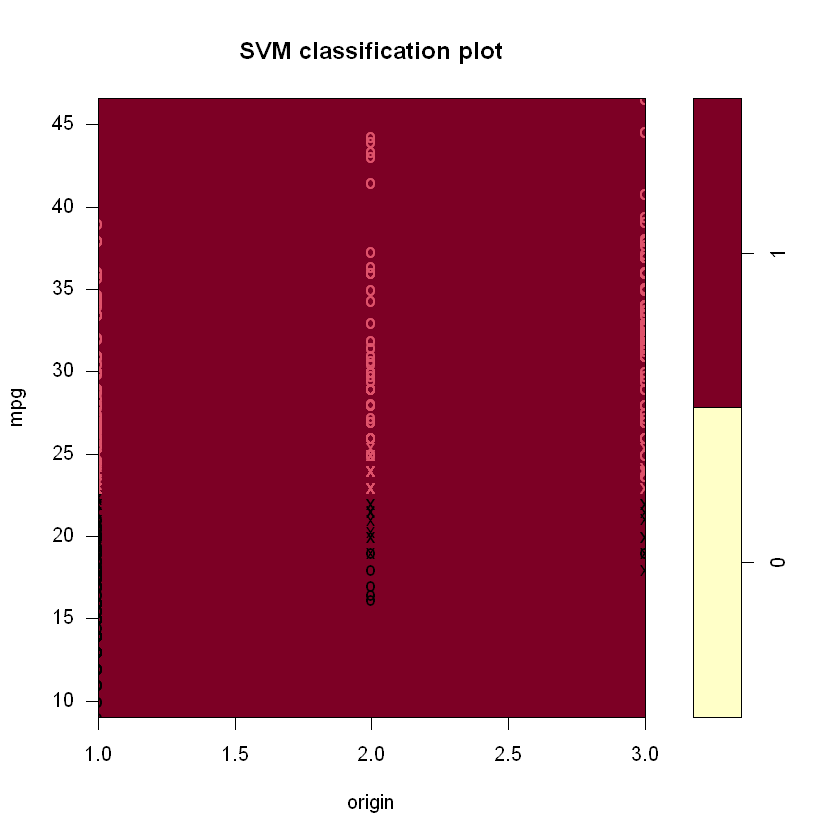

In [10]:
svm.radial = svm(above_median ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plot(svm.radial, Auto, mpg~origin)

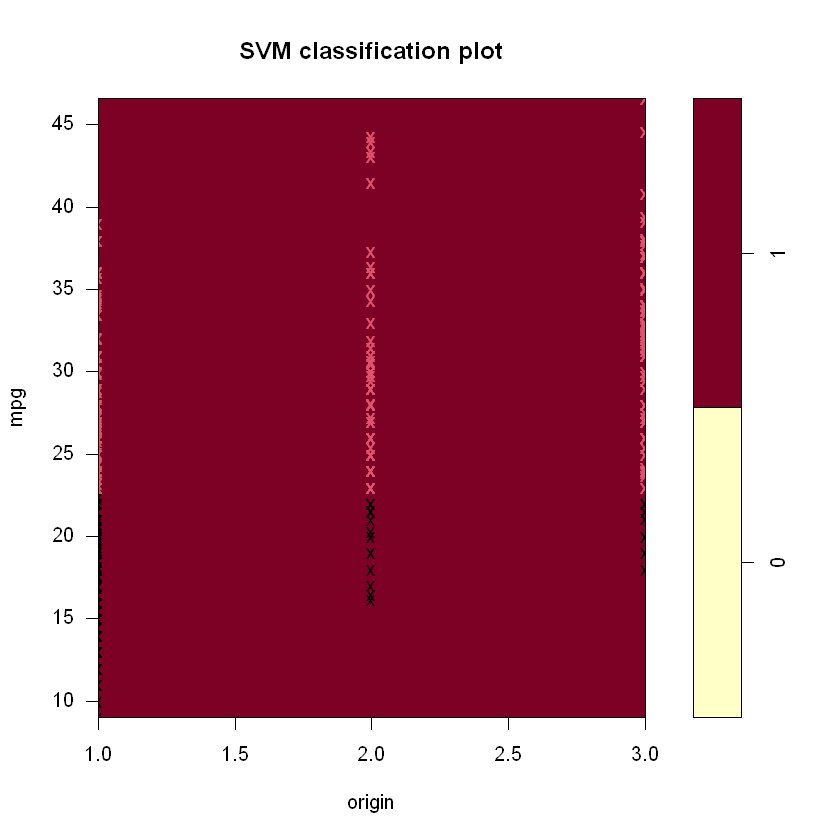

In [54]:
svm.polynomial = svm(above_median ~ ., data = Auto, kernel = "poly", cost = 10, degree = 2)
plot(svm.polynomial, Auto, mpg~origin)

#### Exercise 8 p371

In [12]:
# (a)
set.seed(1)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

In [13]:
# (b)
svmfit = svm(Purchase~., data=OJ.train, kernel="linear", cost=0.01)
summary(svmfit)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [14]:
# (c)
train.pred = predict(svmfit, OJ.train)
table(OJ.train$Purchase, train.pred)

## the training error rate is (75 + 65) / (420 + 65 + 75 + 240) = 17.5%

    train.pred
      CH  MM
  CH 420  65
  MM  75 240

In [15]:
test.pred <- predict(svmfit, OJ.test)
table(OJ.test$Purchase, test.pred)

## the test error rate is (33 + 15) / (153 + 15 + 33 + 69) = 17.8%

    test.pred
      CH  MM
  CH 153  15
  MM  33  69

In [18]:
# (d)
set.seed(1)
svmtune = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost=c(0.01,0.1,0.5,1,5,10)))
summary(svmtune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.5

- best performance: 0.16875 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.17625 0.02853482
2  0.10 0.17250 0.03162278
3  0.50 0.16875 0.02651650
4  1.00 0.17500 0.02946278
5  5.00 0.17250 0.03162278
6 10.00 0.17375 0.03197764


In [27]:
# (e)
train.pred <- predict(svmtune$best.model, OJ.train)
table(OJ.train$Purchase, train.pred)

## new training error rate : 16.5%

    train.pred
      CH  MM
  CH 424  61
  MM  71 244

In [30]:
test.pred = predict(svmtune$best.model, OJ.test)
table(OJ.test$Purchase, test.pred)

## new test error rate : 18.4%

    test.pred
      CH  MM
  CH 155  13
  MM  29  73

In [36]:
# (f)
svm_radial = svm(Purchase~., data=OJ.train, kernel="radial")
summary(svmfit)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [40]:
# train error
train.pred = predict(svm_radial, OJ.train)
table(predict=train.pred, truth=OJ.train$Purchase)

## 15,1%

       truth
predict  CH  MM
     CH 441  77
     MM  44 238

In [43]:
(44+77) / (441+77+44+238)

[1] 0.15125

In [42]:
# test error
test.pred = predict(svm_radial, OJ.test)
table(predict=test.pred, truth=OJ.test$Purchase)

## 18.5%

       truth
predict  CH  MM
     CH 151  33
     MM  17  69

In [44]:
(17+33) / (151+33+17+69)

[1] 0.1851852

In [ ]:
set.seed(1)
radialOJ = tune(svm, Purchase~., data = OJ.train, kernel = "radial", ranges=list(cost=c(0.01,0.1,0.5,1,10)))

In [34]:
svm.pred = predict(radialOJ$best.model, OJ.train)
table(predict=svm.pred, truth=OJ.train$Purchase)

## 14,8%

       truth
predict  CH  MM
     CH 438  71
     MM  47 244

In [45]:
(47+71) / (438+71+47+244)

[1] 0.1475

In [35]:
svm.pred = predict(radialOJ$best.model, OJ.test)
table(predict=svm.pred, truth=OJ.test$Purchase)

## 17.8%

       truth
predict  CH  MM
     CH 150  30
     MM  18  72

In [46]:
(18+30) / (150+30+18+72)

[1] 0.1777778

In [58]:
# (g)
svm_polynomial = svm(Purchase~., data=OJ.train, kernel="poly", degree=2)
summary(svm_polynomial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 225 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [59]:
train.pred = predict(svm_polynomial, OJ.train)
table(predict=train.pred, truth=OJ.train$Purchase)

## 15,4

       truth
predict  CH  MM
     CH 449 110
     MM  36 205

In [60]:
(32+91) / (453+91+32+224)

[1] 0.15375

In [61]:
test.pred = predict(svm_polynomial, OJ.test)
table(predict=test.pred, truth=OJ.test$Purchase)

## 22.2%

       truth
predict  CH  MM
     CH 153  45
     MM  15  57

In [62]:
(13+47) / (155+47+13+55)

[1] 0.2222222

In [63]:
polyOJ = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, ranges = list(cost = 10^seq(-2, 1, by = 0.2)))
summary(polyOJ)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 6.309573

- best performance: 0.18375 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39375 0.06541799
2   0.01584893 0.37125 0.06456317
3   0.02511886 0.36500 0.06286007
4   0.03981072 0.35500 0.07149204
5   0.06309573 0.33750 0.05204165
6   0.10000000 0.32000 0.04609772
7   0.15848932 0.27750 0.05426274
8   0.25118864 0.21875 0.04259385
9   0.39810717 0.20375 0.04528076
10  0.63095734 0.20375 0.04528076
11  1.00000000 0.20000 0.04750731
12  1.58489319 0.19625 0.04372023
13  2.51188643 0.18625 0.03972562
14  3.98107171 0.18500 0.03574602
15  6.30957344 0.18375 0.03910900
16 10.00000000 0.18625 0.04505013


In [67]:
train.pred = predict(polyOJ$best.model, OJ.train)
table(predict=train.pred, truth=OJ.train$Purchase)

## 15,8%

       truth
predict  CH  MM
     CH 447  88
     MM  38 227

In [69]:
(38+88) / (447+88+38+227)

[1] 0.1575

In [68]:
test.pred = predict(polyOJ$best.model, OJ.test)
table(predict=test.pred, truth=OJ.test$Purchase)

## 18,9%

       truth
predict  CH  MM
     CH 154  37
     MM  14  65

In [70]:
(14+37) / (154+37+14+65)

[1] 0.1888889

In [ ]:
# (h)
## The support vector machines with the radial kernel gives results with the lowest training and test error rates out of the 3 approaches. 